# Исследование объявлений о продаже квартир

Онлайн-сервис по продаже квартир планирует построить автоматизированную систему определения рыночной стоимости объектов недвижимости для отслеживания аномалий и мошеннической деятельности.

***Задача*** для анализа - установить параметры, влияющие на стоимость недвижимости.

***Входные данные*** — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных ( расстояние до центра, аэропорта, ближайшего парка и водоёма и т.д. ). 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Первичный-аналитический-осмотр-данных" data-toc-modified-id="Первичный-аналитический-осмотр-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Первичный аналитический осмотр данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Формирование-дополнительных-данных" data-toc-modified-id="Формирование-дополнительных-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Формирование дополнительных данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-распределения-значений" data-toc-modified-id="Изучение-распределения-значений-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение распределения значений</a></span></li><li><span><a href="#Удаление--неправдоподобных-значений" data-toc-modified-id="Удаление--неправдоподобных-значений-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Удаление  неправдоподобных значений</a></span></li><li><span><a href="#Выявление-зависимости-цены-от-параметров-недвижимости" data-toc-modified-id="Выявление-зависимости-цены-от-параметров-недвижимости-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Выявление зависимости цены от параметров недвижимости</a></span></li><li><span><a href="#Изучение-лидеров-по-объявлениям-продажи-квартир" data-toc-modified-id="Изучение-лидеров-по-объявлениям-продажи-квартир-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Изучение лидеров по объявлениям продажи квартир</a></span></li><li><span><a href="#Изучение-предложений-квартир-в-Санкт-Петербурге" data-toc-modified-id="Изучение-предложений-квартир-в-Санкт-Петербурге-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Изучение предложений квартир в Санкт-Петербурге</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Первичный аналитический осмотр данных

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Чтение файла с данными с сохранением в 'data'
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep = '\t')

# Получение первых 5 строк таблицы 'data'
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


# Исследование объявлений о продаже квартир

Онлайн-сервис по продаже квартир планирует построить автоматизированную систему определения рыночной стоимости объектов недвижимости для отслеживания аномалий и мошеннической деятельности.

***Задача*** для анализа - установить параметры, влияющие на стоимость недвижимости.

***Входные данные*** — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных (расстояние до центра, аэропорта, ближайшего парка и водоёма и т.д.). 

In [2]:
# Получение общей информации о данных в таблице 'data'
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

###### Вывод

Всего в таблице 22 столбца со следующими типами данных: bool, float64, int64, object.

Наименование столбцов и информация, содержащаяся в них:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

Всего в датасете 23699 строк. При этом, только в столбцах *first_day_exposition*, *floor*, *last_price*, *open_plan*, *rooms*, *studio*, *total_area* и *total_images* все строки заполнены данными. Это говорит о том, что в остальных столбцах есть отсутствующие значения. Во избежание искажения результатов дальнейшего анализа необходимо рассмотреть логичную замену пропущенных значений, где это уместно.

Столбец *cityCenters_nearest* состоит из символов верхнего и нижнего регистров. Для удобства дальнейшей работы его следует переименовать.

Тип данных столбца *first_day_exposition* - *object*. Для удобства дальнейшей работы необходимо изменить тип данных столбца на *datetime* без отражения времени, так как данные по времени не занесены в столбец.

Тип данных столбцов *floors_total*, *balcony*, *parks_around3000*, *ponds_around3000*, *days_exposition* - *float*. При этом в данных столбцах отражаются целые значения. С целью улучшения визуального представления данных необходимо заменить тип данных указанных столбцов на *int*.

Тип данных столбца *is_apartment* - *object*, но содержит, кроме пропусков, булевы значения. Таким образом, тип данных указанного столбца следует заменить на логический.

## Предобработка данных

Изменим название столбца *cityCenters_nearest* на *cityсenters_nearest*: 

In [3]:
# Переименование столбца 'cityCenters_nearest'
data.rename(columns = {'cityCenters_nearest':'citycenters_nearest'}, inplace = True)

Рассмотрим подробнее столбцы, в которых обнаружены пропуски:

**ceiling_height.** Наличие пропусков может быть связано с невнесением данных пользователями при размещении объявлений. Вероятнее всего, пользователи, разместившие данные объявления, просто не знают высоту потолков в своих квартирах и не придают данному показателю серьезного значения. Пустые данные этого столбца можно заменить на медианное значение по столбцу.

**floors_total.** Наличие пропусков может быть связано с невнесением данных пользователями при размещении объявлений. Также может быть, что данные не внесены по причине того, что продающиеся квартиры находятся в одноэтажных домах. Проверим данное предположение:

In [4]:
# Срез таблицы 'data' по столбцам 'floors_total' и 'floor' с пропущенными значениями в столбце 'floors_total'
data[['floors_total','floor']][data['floors_total'].isna()].head()

,floors_total,floor
186,NaN,4
237,NaN,1
457,NaN,12
671,NaN,8
1757,NaN,9


Как мы видим из среза, пропущенные значения в столбце *floors_total* встречаются для квартир, находящихся на разных этажах. В таком случае можно предположить, что этаж, на котором находится квартира, и является последним этажом в доме. Таким образом, замену пропущенных значений можно произвести на значения, равные значениям столбца *floor*.

**living_area.** Наличие пропусков может быть связано с невнесением данных пользователями при размещении объявлений. Пользователи могут не знать жилую площадь своих квартир, зная общую. Можно заменить пропущенные значения на расчетное значение, рассчитанное с помощью доли, которую составляет жилая площадь от общей площади квартиры.

**is_apartment.** Наличие пропусков может быть связано с невнесением данных пользователями при размещении объявлений. Данный столбец, по-сути, содержит булевы значения, и пропущенные значения в нем, вероятнее всего, соответствуют значениям *False*. Данное значение и будем использовать для замены.

**kitchen_area.** Наличие пропусков может быть связано с невнесением данных пользователями при размещении объявлений. Пользователи могут не знать площадь отдельных комнат, зная общую. Можно заменить пропущенные значения на расчетное значение, рассчитанное с помощью доли, которую составляет площадь кухни от общей площади квартиры.

**balcony.** Наличие пропусков может быть связано с невнесением данных пользователями при размещении объявлений. Вероятнее всего пропущенные значения указывают на отсутствие в квартирах балкона. Заменим пропущенные значения на ноль.

**locality_name.** Наличие пропусков может быть связано с невнесением данных пользователями при размещении объявлений. Также, в случае, если данные в столбце получены автоматически на основе картографических данных, наличие пропущенных значений может быть связано со сбоем автоопределения местоположения или отстутствием в картографических данных конкретного населенного пункта. Для замены пропущенных значений нет подходящих данных.

**airports_nearest, citycenters_nearest, parks_nearest, ponds_nearest.** Наличие пропусков, вероятнее всего, связано со значительной удаленностью населенного пункта от данных объектов.

**parks_around3000, ponds_around3000.** Наличие пропусков, вероятнее всего, связано с отстутствием в радиусе трех километров парков и прудов. Проверим данное предположение, а также предположение выше:

In [5]:
# Срез данных из строк таблицы, соответствующих пропущенным значениям в столбцах:
#'parks_around3000', 'ponds_around3000', 'airports_nearest', 'cityCenters_nearest'. 
data[pd.isna(data['parks_around3000']) & pd.isna(
    data['ponds_around3000']) & pd.isna(
    data['airports_nearest']) & pd.isna(
    data['citycenters_nearest'])
    ]
# Если парков и прудов нет в пределах 3 км, то ближе нет тем более

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,NaN,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,NaN,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,NaN,...,5.50,NaN,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.50,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.00,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.70,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В полученном срезе видно, что квартиры расположены в поселках, деревнях и селах, что подтверждает наше предположение.
Итого, для замены пропущенных значений столбцов *airports_nearest*, *citycenters_nearest*, *parks_nearest*, *ponds_nearest* нет подходящих данных, а для замены пропущенных значений в столбцах *parks_around3000*, *ponds_around3000* используем ноль.

**days_exposition.** В столбце отражено количество дней от публикации объявления до его снятия. Пропуски могли бы быть связаны с тем, что объявление до сих пор не снято, но исходя из общей информации о данных видно, что цены на момент снятия объявлений с публикации внесены во все строки датафрейма. Таким образом, наличие пропущенных значений может быть связано с ошибкой записи данных в системе при снятии объявления с публикации. Замену пропущенных значений логично провести медианным значением по столбцу.

Произведем замену пропущенных значений в столбцах согласно вышеизложенным предположениям:

In [6]:
# Создание функции для замены значений с помощью метода. fillna()
def replace_nan(column, value):
    data[column] = data[column].fillna(value)

# Замена пропущенных значений 'ceiling_height' на медианное значение по столбцу
 # Расчет медианы по столбцу 'ceiling_height'
median_ceiling_height = data['ceiling_height'].median()
replace_nan('ceiling_height', median_ceiling_height)

# Замена пропущенных значений 'floors_total' на соответствующие значения столбца 'floor'
 # Создание функции для замены пропущенных значений
def floors_replace_nan(row):
    if pd.isna(row['floors_total']) == True:
        floors_total = row['floor']
        return floors_total
    else:
        return row['floors_total']
 # Применение функции для замены пустых значений        
data['floors_total'] = data.apply(floors_replace_nan, axis = 1)

# Замена пропущенных значений 'living_area' на расчетные значения по доле жилой площади от общей площади квартиры
 # Расчет доли жилой площади от общей площади квартиры
living_area_part = data['living_area'].sum() / data['total_area'].sum()
 # Создание функции для замены пропущенных значений
def living_area_replace_nan(row):
    if pd.isna(row['living_area']) == True:
        living_area = row['total_area'] * living_area_part
        return living_area
    else:
        return row['living_area']
 # Применение функции для замены пустых значений 
data['living_area'] = data.apply(living_area_replace_nan, axis = 1)

# Замена пропущенных значений 'kitchen_area' на расчетные значения по доле кухонной площади от общей площади квартиры
 # Расчет доли кухонной площади от общей площади квартиры
kitchen_area_part = data['kitchen_area'].sum() / data['total_area'].sum()
 # Создание функции для замены пропущенных значений
def kitchen_area_replace_nan(row):
    if pd.isna(row['kitchen_area']) == True:
        kitchen_area = row['total_area'] * kitchen_area_part
        return kitchen_area
    else:
        return row['kitchen_area']
 # Применение функции для замены пустых значений 
data['kitchen_area'] = data.apply(kitchen_area_replace_nan, axis = 1)

# Замена пропущенных значений 'is_apartment' на 'False'
replace_nan('is_apartment', 'False')

# Замена пропущенных значений 'balcony' на ноль
replace_nan('balcony', 0)

# Замена пропущенных значений 'parks_around3000' на ноль
replace_nan('parks_around3000', 0)

# Замена пропущенных значений 'ponds_around3000' на ноль
replace_nan('ponds_around3000', 0)

# Замена пропущенных значений 'days_exposition' на медианное значение
median_days_exposition = data['days_exposition'].median()
replace_nan('days_exposition', median_days_exposition)

# Вывод на экран первых 5 строк обновленного датасета и общей информации о данных
display(data.head())
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,...,25.00000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1,False,...,11.00000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4,False,...,8.30000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,83.495783,9,False,...,25.17134,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,...,41.00000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Исходя из общей информации о данных, пропуски в столбцах *ceiling_height*, *floors_total*, *living_area*, *kitchen_area*, *is_apartment*, *balcony*, *parks_around3000*, *ponds_around3000*, *days_exposition* были успешно заменены.

Для удобства дальнейшей обработки данных, а также для улучшения визуального представления данных, изменим типы данных столбцов согласно выводу по этапу 1:

In [7]:
# Изменение типа данных столбца 'first_day_exposition'
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], yearfirst = True)

# Изменение типа данных столбцов 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000'
 # Создание функции для изменения типов данных столбцов из списка
def change_type(column_names, correct_type):
    for name in column_names:
        data[name] = data[name].astype(correct_type)
 # Формирование списка столбцов для преобразования типа данных в 'int'
columns_to_int = ['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition']
 # Формирование списка столбцов для преобразования типа данных в 'bool'
columns_to_bool = ['is_apartment']  
 # Применение функции
change_type(columns_to_int, int)
change_type(columns_to_bool, bool)

# Вывод первых 5 строк и общей информации об обновленном датасете на экран
display(data.head())
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,True,...,25.00000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,True,...,11.00000,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,True,...,8.30000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,83.495783,9,True,...,25.17134,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,True,...,41.00000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Исходя из общей информации о данных видно, что типы данных столбцов *first_day_exposition*, *floors_total*, *balcony*, *parks_around3000*, *ponds_around3000*, *is_apartment*, *days_exposition* были успешно изменены.

###### Вывод

На этапе предобработки данных были подробно рассмотрены и обработаны столбцы с пропусками значений. Логичная замена пропущенных значений была осуществлена согласно списку ниже:
- *ceiling_height* - замена на медианное значение по столбцу;
- *floors_total* - замена на соответствующие значения столбца *floor*;
- *living_area* - замена на значение, рассчитанное с помощью доли жилой площади к общей площади квартиры;
- *kitchen_area* - замена на значение, рассчитанное с помощью доли кухонной площади к общей площади квартиры;
- *is_apartment* - замена на *False*;
- *balcon* - замена на ноль; 
- *parks_around3000* - замена на ноль;
- *ponds_around3000* - замена на ноль;
- *days_exposition* - замена на медианное значение по столбцу.

Пропущенные значения в столбцах:
- *locality_name*;
- *airports_nearest*;
- *cityсenters_nearest*;
- *parks_nearest*;
- *ponds_nearest*;
- *days_exposition*

не были заменены по причине отсутствия подходящих данных.

Кроме того, были изменены типы данных столбцов, согласно списку ниже:
- *first_day_exposition* - с object на datetime;
- *floors_total* - c float на int;
- *balcony* - c float на int;
- *parks_around3000* - c float на int;
- *ponds_around3000* - c float на int;
- *is_apartment* - c object на bool;
- *days_exposition* - с float на int.



## Формирование дополнительных данных

На данном этапе перед нами стоят задачи:

1. Рассчитать и добавить в датасет следующие показатели:


- Цена квадратного метра (*square_meter_price*);
- День недели публикации объявления (*exposition_weekday*);
- Месяц публикации объявления (*exposition_month*);
- Год публикации объявления (*exposition_year*);
- Cоотношение жилой и общей площади (*living_area_part*);
- Cоотношение кухонной и общей площади (*kitchen_area_part*).


2. Присвоить следующие категории значениям столбца *floor* и сохранить в новом столбце (*categorized_floors*):


- *Первый*;
- *Последний*;
- *Другой*.

In [8]:
# Расчет и добавление в таблицу столбца с ценой квадратного метра
data['square_meter_price'] = data['last_price'] / data['total_area']

# Расчет и добавление в таблицу отдельных столбцов с днями недели, месяцами и годами публикации объявления
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday
data['exposition_month'] = data['first_day_exposition'].dt.month
data['exposition_year'] = data['first_day_exposition'].dt.year

# Расчет и добавление в таблицу столбца с соотношением жилой и общей площади квартиры
data['living_area_part'] = data['living_area'] / data['total_area']

# Расчет и добавление в таблицу столбца с соотношением кухонной и общей площади квартиры
data['kitchen_area_part'] = data['kitchen_area'] / data['total_area']

# Категоризация значений столбца 'floor'
 # Создание функции для присвоения категорий этажам
def categorize_floors(row):
    if row['floor'] == 1:
        return 'первый'
    else:
        if 1 < row['floor'] < row['floors_total']:
            return 'другой'
        else:
            return 'последний'
    
 # Создание столбца категорий этажей и применение функции для его заполнения
data['categorized_floors'] = data.apply(categorize_floors, axis = 1)

# Вывод на экран первых строк обновленного датасета
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,exposition_weekday,exposition_month,exposition_year,living_area_part,kitchen_area_part,categorized_floors
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,True,...,2,755.0,95,120370.370370,3,3,2019,0.472222,0.231481,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,True,...,0,NaN,81,82920.792079,1,12,2018,0.460396,0.272277,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,True,...,2,574.0,558,92785.714286,3,8,2015,0.612500,0.148214,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,83.495783,9,True,...,3,234.0,424,408176.100629,4,7,2015,0.525131,0.158310,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,True,...,1,48.0,121,100000.000000,1,6,2018,0.320000,0.410000,другой


###### Вывод

На данном этапе были расчитаны добавлены в датасет:

- Цена квадратного метра (*square_meter_price*);
- День недели публикации объявления (*exposition_weekday*);
- Месяц публикации объявления (*exposition_month*);
- Год публикации объявления (*exposition_year*);
- Cоотношение жилой и общей площади (*living_area_part*);
- Cоотношение кухонной и общей площади (*kitchen_area_part*);
- Столбец с категориями этажей (*categorized_floors*).

## Исследовательский анализ данных

### Изучение распределения значений

Напишем функцию для изучения распределения значений в наборе данных:

In [9]:
def build_diags(
    column,
    bins,
    range,
    xlabel,
    zoom,
    limit_lower,
    limit_upper):
    
    # Вывод на экран гистограммы
    data.hist(column, bins = bins, range = range)
    plt.title(f'Распределение значений {column}')
    plt.xlabel(xlabel)
    plt.ylabel('Частота')
    plt.show()
    
    # Вывод на экран диаграммы размаха
    data.boxplot(column)
    plt.title(f'Размах значений {column}')
    plt.ylabel(xlabel)
    plt.show()
    
    # Вывод на экран масштабированной диаграммы размаха
    if zoom == 'on':  
        data.boxplot(column)
        plt.ylim(limit_lower, limit_upper)
        plt.title(f'Размах значений {column}, масштабированный')
        plt.ylabel(xlabel)
        plt.show()

Изучим следующие параметры: *total_area*, *price*, *rooms*, *ceiling_height*, *days_exposure*, *floors_total*, *citycenters_nearest*.

In [10]:
# Вывод на экран описательной статистики по 'total_area'
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Площадь выставленных на продажу квартир, в среднем, равна 60 кв.метрам, при медианном значении, равном 52.

Наблюдается высокое стандартное отклонение. Площадь квартир, размещенных на продажу, в среднем, отклоняется на 36 кв.метров.

Подозрительным значением в полученных данных является максимальное, равное 900 кв.метрам. Маловероятно, что на продажу выставлена квартира, действительно обладающая такой площадью. Если данное значение действительно является выбросом, то, возможно, в столбце присутствуют и другие аномальные значения. Кроме того, данные такого рода завышают среднее значение, делая медиану более пригодным значением для характеристики усредненнгого значения в выборке.

Построим гистограмму и диаграмму размаха для изучения распределения значений в наборе данных:

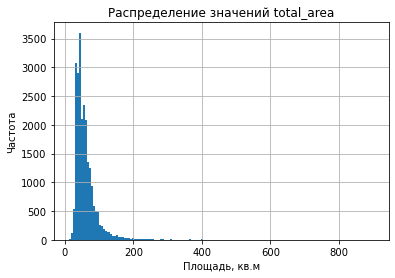

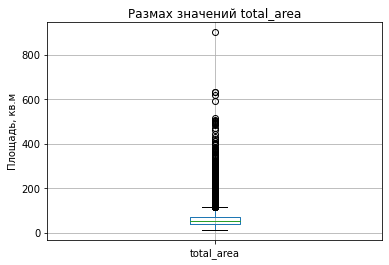

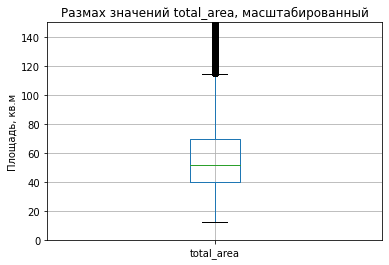

In [11]:
build_diags(
    'total_area',
    150,
    None,
    'Площадь, кв.м',
    'on',
    0,
    150)

В целом, распределение значений в столбце *total_area* выглядит нормальным, но за площадь в 115 квадратных метров тянется хвост редких значений. Плотность редких значений свыше 550 кв.м падает до единичных значений, что дает нам возможность в дальнейшем удалить из датасета эти данные.

In [12]:
# Вывод на экран описательной статистики по 'last_price'
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Цена выставленных на продажу квартир, в среднем, равна 6,5 млн., при медианном значении, равном 4,65 млн.

Наблюдается высокое стандартное отклонение. Цена квартир, размещенных на продажу, в среднем, отклоняется на 10,8 млн.от среднего значения.

Подозрительным значением является минимальное, равное 12,19 тыс. Маловероятно, что столь низкая цена даже за минимальную площадь из выборки указана корректно.

В данном столбце также есть максимальное значение, равное 760 млн., что на порядок превышает большую часть значений в столбце. 

Обнаруженные аномальные значения влияют на среднее значение, делая медиану более пригодным значением для характеристики усредненнгого значения в выборке.

Также, наличие в столбце аномальных значений может быть не единичным.

Построим гистограмму и диаграмму размаха для изучения распределения значений в наборе данных:

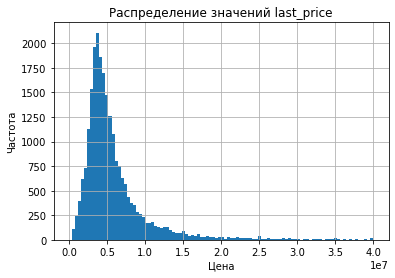

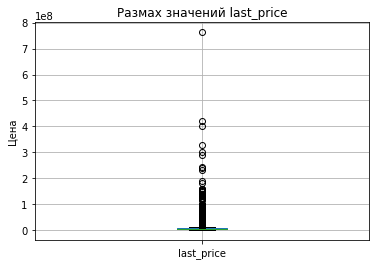

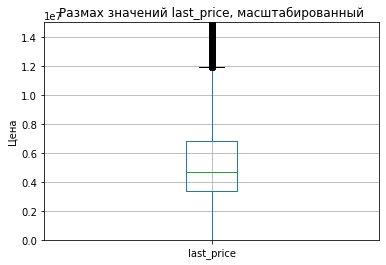

In [13]:
build_diags(
    'last_price',
    100,
    (0, 40000000),
    'Цена',
    'on',
    0,
    15000000)

Распределение выглядит нормальным, но за ценой в 12 млн. наблюдается хвост редких значений.Плотность редких значений свыше 150 млн. заметно падает до единичых значений, что дает нам возможность удалить их из датасета.

In [14]:
# Вывод на экран описательной статистики по 'rooms'
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Количество комнат в выставленных на продажу квартирах, в среднем, равно 2,07 при медиане, равной 2.

Стандартное отклонение логично для данной специфики данных. Количество комнат в квартирах, размещенных на продажу, в среднем, отклоняется на 1 от среднего значения.

Подозрительными являются минимальное и максимальное значения в выборке. Но в то же время текущее максимальное значения и рассмотренные выше начинают наводить на мысль о выставленной на продажу очень крупной недвижимости, а нулевые значения могут информировать нас о свободной планировке.

Построим гистограмму и диаграмму размаха для изучения распределения значений в наборе данных:

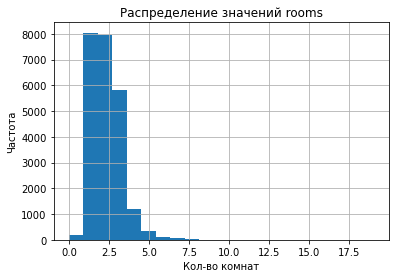

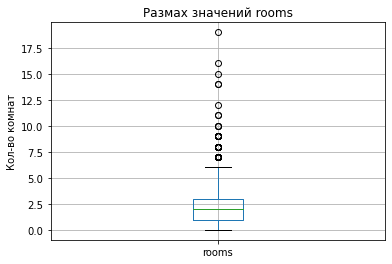

In [15]:
build_diags(
    'rooms',
    21,
    None,
    'Кол-во комнат',
    'off',
    None,
    None)

Распределение выглядит ожидаемо. Наиболее популярными являются 1 и 2-х комнатные квартиры.
Нулевые значения не являются выбросами и вероятнее всего отностяся к квартирам - студиям.
Редкие значения в данном столбце единичны, но могут быть правдой. Кроме того, описательная статистика выглядит хорошо, и выбросы не сильно влияют на средние значения. Оставим данные редкие значения в таблице.

In [16]:
# Вывод на экран описательной статистики по 'rooms'
data['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Средняя высота потолков в выставленных на продажу квартирах, в среднем, равна 2,7 при медиане, равной 2,65.

Стандартное отклонение высокое. Высота потолков в  выставленных на продажу квартирах, в среднем, отклоняется на 0,98 от среднего значения.

Подозрительными являются минимальное и максимальное значения в выборке. 100-метровых потолков в квартирах не бывает, ровно как и 1-метровых. 

Построим гистограмму и диаграмму размаха для изучения распределения значений в наборе данных:

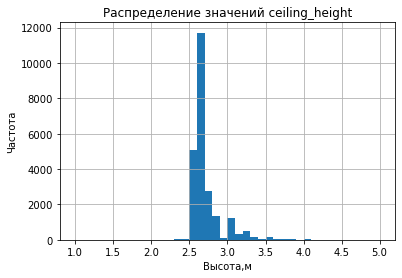

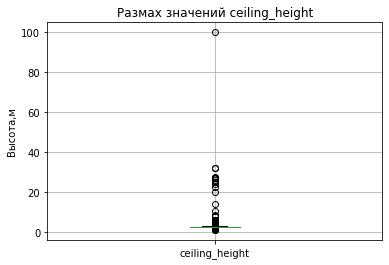

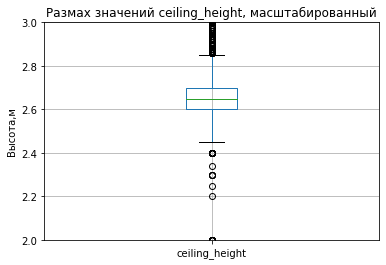

In [17]:
build_diags(
    'ceiling_height',
    40,
    (1,5),
    'Высота,м',
    'on',
    2,
    3)

Распределение выглядит ожидаемо. Наиболее распространенными являются конкретные значения высоты потолков.
В то же время на диаграмме размаха выявлены редкие значения выше и ниже верхней и нижней границ. При этом, плотность редких значений над верхней границей прерывается выше 6, и далее наблюдаются единичные значения. Значения до 6 будем считать правдоподобными. В квартирах/домах большой площади возможна такая высота потолков. При этом, значения ниже 2.4 выглядят крайне неправдоподобно. Сложно представить себе настолько низкие потолки.

In [18]:
# Вывод на экран описательной статистики по 'days_exposition'
data['days_exposition'].describe()

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее время продажи квартир равно 169 дням, при медиане, равной 95. Данные показатели сильно отличаются, что говорит о том, что в данных есть значения, значительно влияющие на среднее значение.

Величина стандартного отклонения также говорит о том, что данные крайне неоднородны.

Рассмотрим подробнее распределение значений в наборе данных:

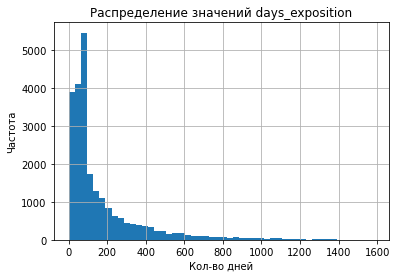

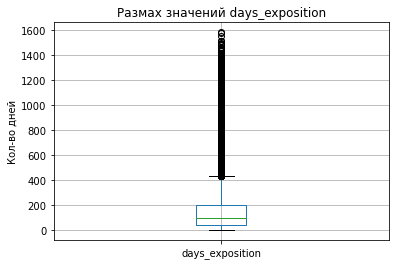

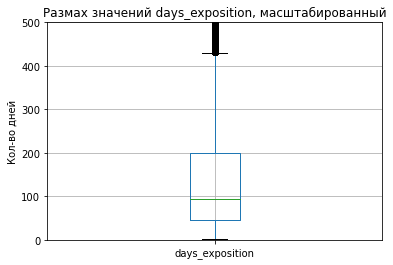

In [19]:
build_diags(
    'days_exposition',
    50,
    None,
    'Кол-во дней',
    'on',
    0,
    500)

Гистограмма демонстрирует Пуассоновское распределение значений, а диаграмма размаха указывает на выбросы, находящиеся свыше границы в 450 дней. Наличие выросов объясняет большое различие между медианой и средним значением. Не будем трогать выбросы в данной выборке, так как данные, все же, выглядят правдоподобно. Возможно,  отдельные квартиры и правда продаются по несколько лет.

Характерным разбросом сроков продажи является межквартильный размах. Наиболее часто продажи длятся порядка 95 дней, что соответствует медианному значению. Продажи считаются очень быстрыми, когда осуществлены раньше первого квартиля - 45 дней, и необычно долгими, когда осуществлены позже третьего квартиля - 199 дней.

In [20]:
# Вывод на экран описательной статистики по 'floors_total'
data['floors_total'].describe()

count    23699.000000
mean        10.671463
std          6.595802
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Среднее по данному столбцу, равное 10,7 отличается от медианы, равной 9.

Величина стандартного отклонения также говорит о том, что данные крайне неоднородны.

Подозрительным значением является максимальное, равное 60. 

Рассмотрим подробнее распределение значений в наборе данных:

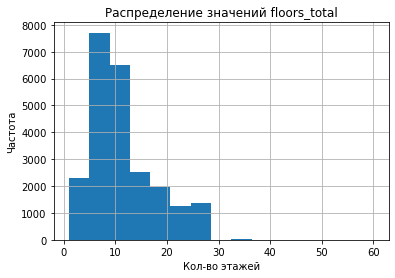

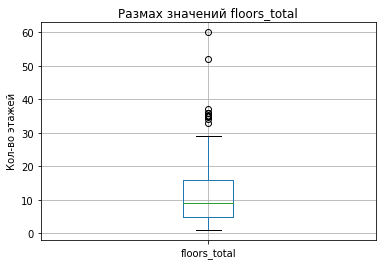

In [21]:
build_diags(
    'floors_total',
    15,
    None,
    'Кол-во этажей',
    'off',
    None,
    None)

Распределение данных выглядит нормально. На диаграмме размаха наблюдаются выбросы выше верхней границы. При этом значения от 30 до 40 правдоподобны. В Санкт-Петербурге есть ЖК до 40 этажей. Значения свыше 40 будем считать неправдоподобными.

In [22]:
# Вывод на экран описательной статистики по 'citycenters_nearest'
data['citycenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: citycenters_nearest, dtype: float64

Среднее по данному столбцу, равное 14191 отличается от медианы, равной 13099.

Величина стандартного отклонения также говорит о том, что данные неоднородны.

Рассмотрим подробнее распределение значений в наборе данных:

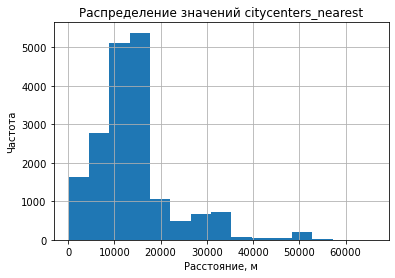

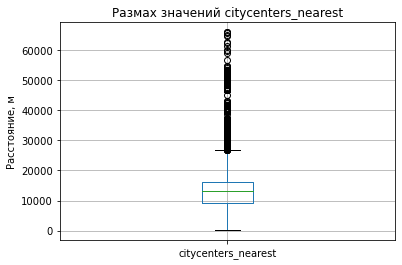

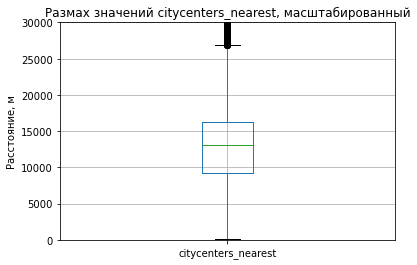

In [23]:
build_diags(
    'citycenters_nearest',
    15,
    None,
    'Расстояние, м',
    'on',
    0,
    30000)

Для данной категории значений распределение выглядит ожидаемо. За границей в 27,5 км наблюдается хвост редких значений. Редкие значения не выглядят неправдоподобными, учитывая протяженность города.

###### Вывод

На этапе изучения данных были подробно рассмотрены значения столбцов *total_area*, *price*, *rooms*, *ceiling_height*, *days_exposure*, *floors_total*, *citycenters_nearest*.

Ниже представлен список столбцов и их значений, принятых за правдоподобные:
- *total_area* < 550;
- *last_price* < 150;
- 2,4 < *ceiling_height* < 6;
- *floors_total* < 40


### Удаление  неправдоподобных значений

На этапе изучения даных были определены правдоподобные области значений рассмотренных столбцов.

Сохраним в переменную *good_data* срез датасета с указанными выше условиями:

In [24]:
good_data = data.query(
    'total_area < 550 and last_price < 150000000 and 2.4 < ceiling_height < 6 and floors_total < 40').reset_index(
    drop = True)
good_data.info()
good_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23603 entries, 0 to 23602
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23603 non-null  int64         
 1   last_price            23603 non-null  float64       
 2   total_area            23603 non-null  float64       
 3   first_day_exposition  23603 non-null  datetime64[ns]
 4   rooms                 23603 non-null  int64         
 5   ceiling_height        23603 non-null  float64       
 6   floors_total          23603 non-null  int64         
 7   living_area           23603 non-null  float64       
 8   floor                 23603 non-null  int64         
 9   is_apartment          23603 non-null  bool          
 10  studio                23603 non-null  bool          
 11  open_plan             23603 non-null  bool          
 12  kitchen_area          23603 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,exposition_weekday,exposition_month,exposition_year,living_area_part,kitchen_area_part,categorized_floors
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,True,...,2,755.0,95,120370.370370,3,3,2019,0.472222,0.231481,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,True,...,0,NaN,81,82920.792079,1,12,2018,0.460396,0.272277,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,True,...,2,574.0,558,92785.714286,3,8,2015,0.612500,0.148214,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,83.495783,9,True,...,3,234.0,424,408176.100629,4,7,2015,0.525131,0.158310,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,True,...,1,48.0,121,100000.000000,1,6,2018,0.320000,0.410000,другой


###### Вывод

В результате отброса неправдоподобных значений из первоначального датасета было исключено 96 строк

### Выявление зависимости цены от параметров недвижимости

Определим, какие факторы больше всего влияют на стоимость квартиры. Для этого изучим зависимость цены от площади, числа комнат, удалённости от центра и категории этажа расположения квартир: первого, последнего или другого. Также изучим зависимость от даты размещения: дня недели, месяца и года.

Для рассмотрения зависимости цены от категории этажа расположения, в столбце *categorized_floors* необходимо присвоить числовые значения категориям *первый*, *последний*, *другой*. Создадим словарь, где присвоим каждой из этих категорий числовое значение:

In [25]:
# Создание словаря c заданием в качестве индексов значений столбца 'categorized_floors'
floors_categories = pd.DataFrame(
    {'categorized_floors': ['первый', 'последний', 'другой'],
     'digital_value': [1,2,3]})

# Вывод на экран полученного словаря
floors_categories

,categorized_floors,digital_value
0,первый,1
1,последний,2
2,другой,3


Произведем замену текстовых значений столбца *categorized_floors* в таблице *good_data* на числовые из созданного словаря:

In [26]:
# Замена значений с помощью словаря
good_data['categorized_floors'] = good_data['categorized_floors'].map(
    floors_categories.set_index(
        'categorized_floors')['digital_value']
)
# Вывод на экран обновленной таблицы *good_data* для проверки замены
good_data['categorized_floors'].head()

0    3
1    1
2    3
3    3
4    3
Name: categorized_floors, dtype: int64

Замена прошла успешно.

Рассмотрим зависимости между значениями столбцов *good_data*:

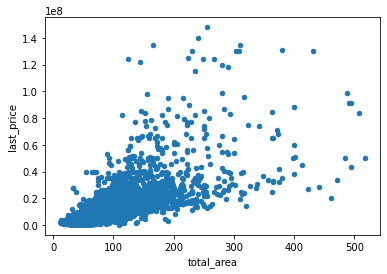

Коэффициент корреляции Пирсона: 0.75



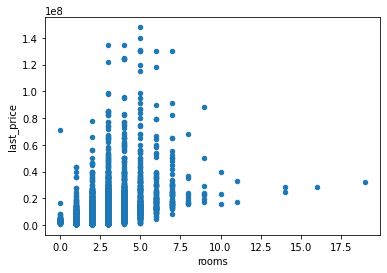

Коэффициент корреляции Пирсона: 0.45



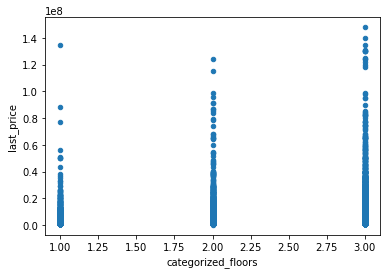

Коэффициент корреляции Пирсона: 0.07



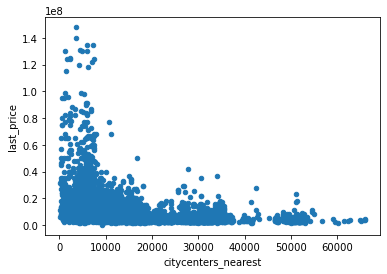

Коэффициент корреляции Пирсона: -0.28



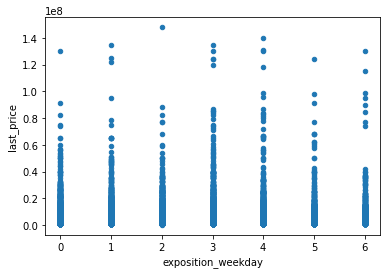

Коэффициент корреляции Пирсона: 0.00



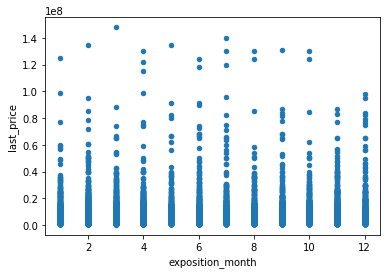

Коэффициент корреляции Пирсона: 0.01



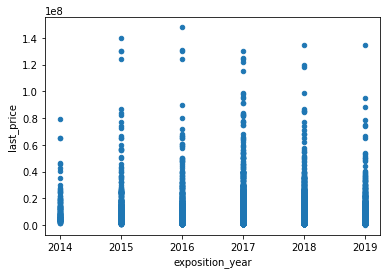

Коэффициент корреляции Пирсона: -0.06



In [27]:
# Создание датафрейма 'variables', содержащего столбцы, необходимые для оценки влияния на цену

variables = ['total_area',
             'rooms',
             'categorized_floors',
             'citycenters_nearest',
             'exposition_weekday',
             'exposition_month',
             'exposition_year']

# Создание функции для определения зависимости цены от других факторов
def price_dependance(data, variables):
    for name in variables:
        data.plot(x=name, y='last_price', kind='scatter')
        plt.show()
        print('Коэффициент корреляции Пирсона: {:.2f}'.format(data['last_price'].corr(data[name])))
        print()

# Применение функции к 'good_data'
price_dependance(good_data, variables)

На построенных диаграммах рассеяния более или менее ярко зависимость цены выражена только от общей площади квартиры. Но, тем не менее, связь с другими показателями все же видна из разной плотности построенных точек, соответствующей определенным значениям осей.

Для того, чтобы представлять зависимости яснее, можно укрупнить данные, использовав при построении диаграмм медианные значения строк столбца *last_price*, соответствующих уникальным значениям столбцов, зависимость от котрых будет рассчитываться. Например: медиана по столбцу *last_price* по 1-комнатным квартирам, 2-комнатным и т.д.

Напишем функцию для определения зависимости медианных цен от каждого из рассматриваемых факторов и заново построим диаграммы.

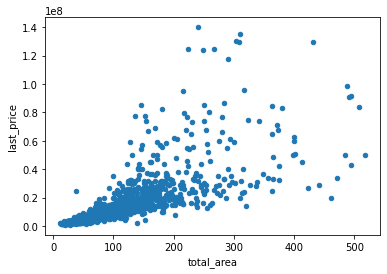

Коэффициент корреляции Пирсона: 0.77



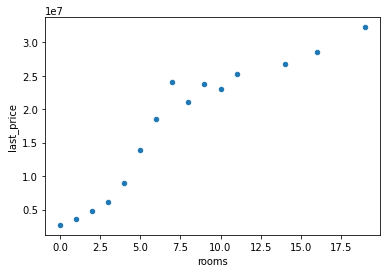

Коэффициент корреляции Пирсона: 0.94



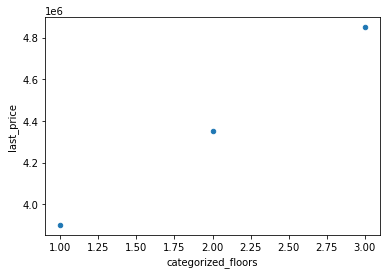

Коэффициент корреляции Пирсона: 1.00



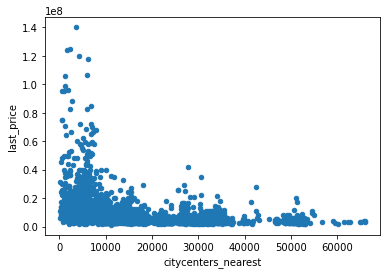

Коэффициент корреляции Пирсона: -0.29



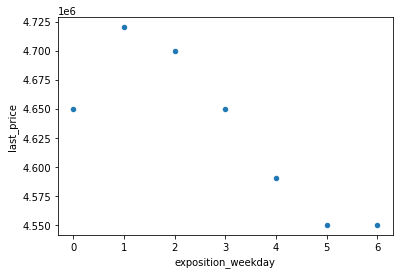

Коэффициент корреляции Пирсона: -0.84



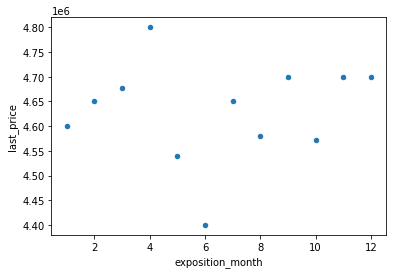

Коэффициент корреляции Пирсона: 0.08



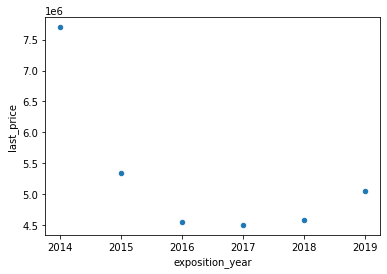

Коэффициент корреляции Пирсона: -0.68



In [28]:
def median_price_dependance(data, variables):
    for name in variables:
        pivot = data.pivot_table(
            index = name,
            values = 'last_price',
            aggfunc = 'median')
        # Создание столбца со значениями из индексов
        pivot[name] = pivot.index
        # Построение диаграммы рассеяния
        pivot.plot(
            kind = 'scatter',
            x = name,
            y= 'last_price' )
        plt.show()
        # Вывод на экран коэффициента корреляции
        print('Коэффициент корреляции Пирсона: {:.2f}'.format(
            pivot['last_price'].corr(pivot[name])))
        print()

# Применение функции к 'good_data'
median_price_dependance(good_data, variables)      

На перестроенных диаграммах точки оформились в достаточно четкие зависимости, при использовании которых нужно понимать, что речь идет об усредненной цене по выбранным параметрам квартир.

###### Вывод

Согласно расчетам выше, топ показателей, влияющих на цену квартир следующий:

1. *Этаж квартиры* (Корреляция = 1, сильная положительная связь);
2. *Количество комнат в квартире* (Корреляция = 0.94, сильная положительная связь);
3. *Площадь квартиры* (Корреляция = 0.77, сильная положительная связь);
4. *Расстояние от центра* (Корреляция = -0.29, слабая отрицательная связь).

Зависимости получились логичными. Первые три показателя действительно ценятся в первую очередь. Низкая корреляция цены с расстоянием от центра, скорее всего, связана с тем, что в выборку попали населенные пункты, где расстояние до центра не указано.

Топ влияния времени выставления квартиры на продажу на цену топ выглядит следующим образом:
1. *День* (Корреляция = -0.84, сильная отрицательная связь). 
2. *Год* (Корреляция = -0.68, умеренная отрицательная связь);
2. *Месяц* (Корреляция = 0.08, слабая положительная связь).

Судя по зависимости цены от времени, можно сделать вывод, что в общей выборке данных, в целом, квартиры подешевели.





### Изучение лидеров по объявлениям продажи квартир

Выделим 10 населенных пунктов с наибольшим числом объявлений о продаже квартир и определим, где наблюдается самая высокая и самая низкая стоимость жилья.

In [29]:
# Создание сводной таблицы лидеров по количеству объявлений, 'top_10_ads'
top_10_ads = good_data.pivot_table(
    index = 'locality_name',
    values = 'square_meter_price',
    aggfunc = ['mean','count']
)
# Переименование столбцов
top_10_ads.columns = ['sq_meter_mean_price','ads_count']

# Изменение типа данных
top_10_ads['sq_meter_mean_price'] = top_10_ads['sq_meter_mean_price'].astype('int')

# Сортировка таблицы и выделение первых 10 строк
top_10_ads = top_10_ads.sort_values(
    by = 'ads_count',
    ascending = False).head(10)

# Создание таблицы лидеров по ценам, 'top_10_prices'
top_10_prices = top_10_ads.sort_values(by = 'sq_meter_mean_price', ascending = False)

# Вывод 'top_10_prices' на экран
top_10_prices

,sq_meter_mean_price,ads_count
locality_name,,
Санкт-Петербург,114047,15667
Пушкин,103147,366
деревня Кудрово,92473,299
посёлок Парголово,90175,327
посёлок Мурино,85725,520
посёлок Шушары,78677,440
Колпино,75443,337
Гатчина,68757,306
Всеволожск,68719,397


###### Вывод

Из населенных пунктов-лидеров по публикации объявлений на продажу квартир:
 - в Санкт - Петербурге наиболее высокая цена за квадратный метр, в среднем равная 104 748 рублям;
 - в Выборге самая низкая цена за квадратный метр, в среднем равная 58 307 рублям.

### Изучение предложений квартир в Санкт-Петербурге

Изучим предложения квартир в городе Санкт-Петрбург с целью определения области, входящей в центр.

In [30]:
# Пересчет значений столбца 'citycenters_nearest' в километры
good_data['citycenters_nearest'] = good_data['citycenters_nearest'] / 1000

# Округление значений столбца 'citycenters_nearest' до целых значений
good_data['citycenters_nearest'] = good_data['citycenters_nearest'].round(decimals = 0)

# Создание среза таблицы 'good_data' по г.'Санкт-Петербург' и сохранение в переменной
spb_data = good_data[good_data['locality_name'] == 'Санкт-Петербург']

# Расчет средней цены за квадратный метр для каждого километра удаленности от центра
kilometer_price = spb_data.pivot_table(
    index = 'citycenters_nearest',
    values = 'square_meter_price',
    aggfunc = ['mean','count']
)

kilometer_price.columns = ['sq_meter_mean_price', 'ads_count']
# Округление данных столбца 'square_meter_price' до целых
kilometer_price = kilometer_price.round(decimals =0)

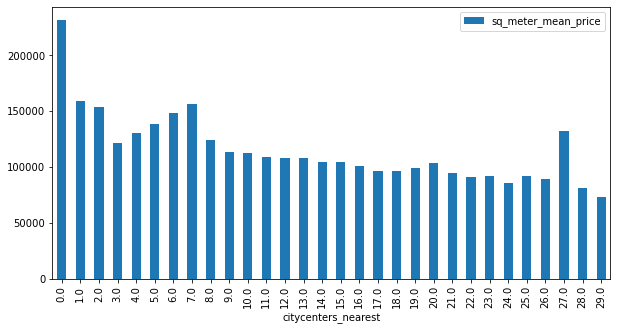

,sq_meter_mean_price,ads_count
citycenters_nearest,,
0.0,231768.0,26
1.0,158980.0,189
2.0,153482.0,308
3.0,121226.0,349
4.0,130166.0,684


,sq_meter_mean_price,ads_count
citycenters_nearest,,
25.0,91531.0,26
26.0,89286.0,53
27.0,132116.0,2
28.0,81162.0,7
29.0,72953.0,6


In [31]:
# Построение столбчатого графика средней цены за кв.метр в зависимости от расстояния от центра
kilometer_price.plot(
    y = 'sq_meter_mean_price',
    kind = 'bar',
    figsize = (10,5)
)
plt.show()
# Вывод на экран последних 5 строк таблицы 'kilometer_price'
display(kilometer_price.head())
display(kilometer_price.tail())

На графике повышенной ценой за квадратный метр обладают квартиры в области с 1 по 2 километр, с 4 по 7 км и 27 км от центра города.

Вероятнее всего центральной зоной можно считать область с 1 по 7 км. Повышенная средняя цена за квадратный метр на 27 км от центра может быть связана с нахождением в этом радиусе особо ценной недвижимости. Из выгрузки последних 5 строк таблицы видно, что таких объектов на 27 км всего 2. Это также может являться причиной расчета высокого среднего значения стоимости квадратного метра.

Детальнее изучим сегмент квартир в центральной зоне Санкт-Петербурга и влияние на их стоимость различных факторов:

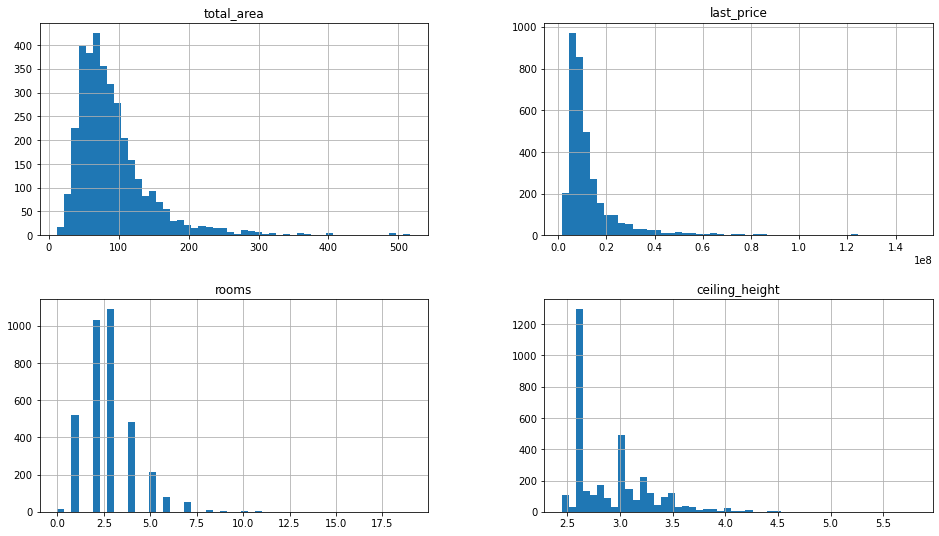

In [32]:
# Создание среза таблицы 'good_data' по центральной зоне Санкт-Петербурга
spb_central_data = good_data.query('citycenters_nearest <= 7 and locality_name == "Санкт-Петербург"')

# Вывод на экран гистограмм по значениям столбцов 'total_area', 'last_price', 'rooms', 'ceiling_height'
spb_central_data[['total_area', 'last_price', 'rooms', 'ceiling_height']].hist(bins = 50, figsize = (16,9))
plt.show()

Распределения значений данных выглядят нормальными.
Менее структурированное распределение в *ceiling_height* связано с наибольшей распространенностью конкретных значений высоты потолков в квартирах.

Наличие хвостов редких значений также ожидаемо, т.к. на рынке встречаются редкие предложения крупной жилой недвижимости.

Рассмотрим зависимость цен на квартиры в центральной зоне Санкт-Петербурга и во всем городе. Используем ранее написанную нами функцию *median_price_dependance*. Влияющие факторы также уже были заданы нами в переменной *variables*.

Результаты для центральной зоны Санкт-Петербурга


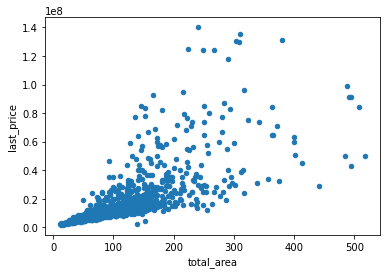

Коэффициент корреляции Пирсона: 0.74



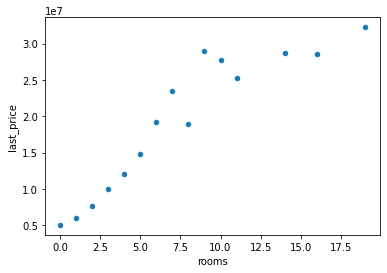

Коэффициент корреляции Пирсона: 0.92



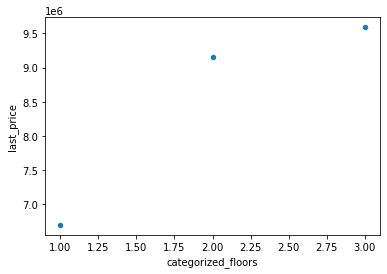

Коэффициент корреляции Пирсона: 0.93



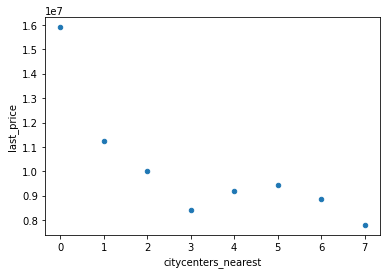

Коэффициент корреляции Пирсона: -0.79



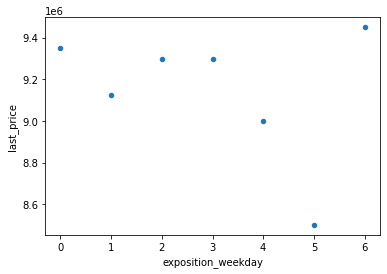

Коэффициент корреляции Пирсона: -0.30



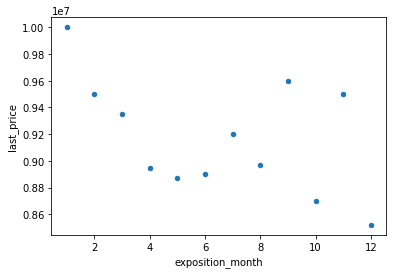

Коэффициент корреляции Пирсона: -0.50



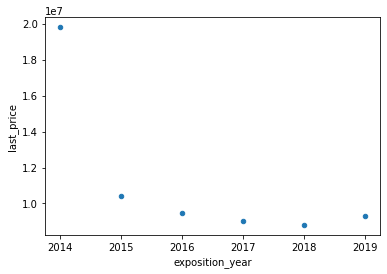

Коэффициент корреляции Пирсона: -0.72

Результаты для всего Санкт-Петербурга


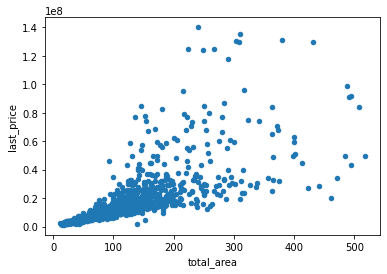

Коэффициент корреляции Пирсона: 0.77



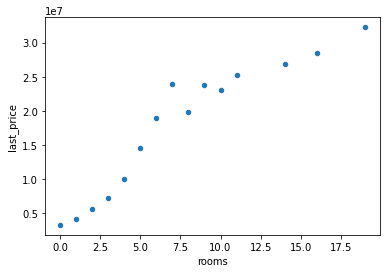

Коэффициент корреляции Пирсона: 0.94



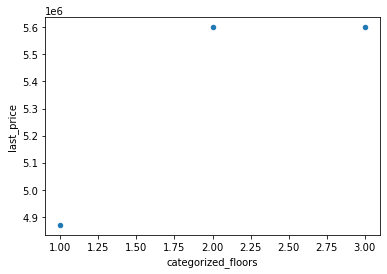

Коэффициент корреляции Пирсона: 0.87



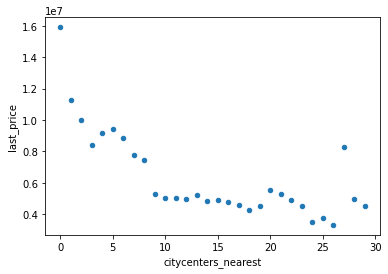

Коэффициент корреляции Пирсона: -0.73



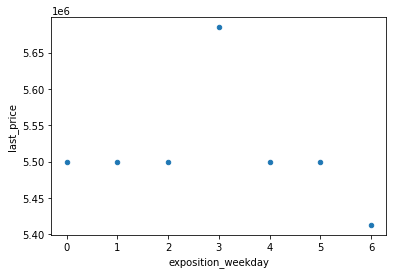

Коэффициент корреляции Пирсона: -0.25



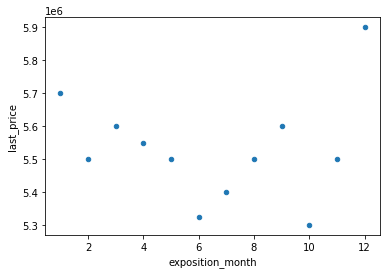

Коэффициент корреляции Пирсона: 0.03



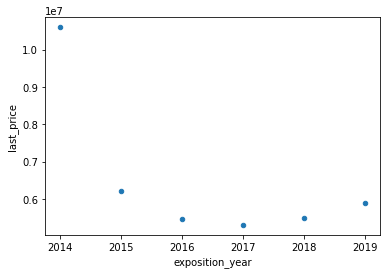

Коэффициент корреляции Пирсона: -0.68



In [33]:
# Применение функции 'median_price_dependance' к 'spb_central_data'
print('Результаты для центральной зоны Санкт-Петербурга')
median_price_dependance(spb_central_data, variables)

# Применение функции median_price_dependance к 'spb_data'
print('Результаты для всего Санкт-Петербурга')
median_price_dependance(spb_data, variables)

Согласно расчетам для центральной зоны Санкт-Петербурга, топ показателей, влияющих на цену квартир следующий:

1. *Этаж квартиры* (Корреляция = 0,93, сильная положительная связь);
2. *Количество комнат в квартире* (Корреляция = 0.92, сильная положительная связь);
3. *Расстояние от центра* (Корреляция = -0.79, сильная отрицательная связь);
4. *Площадь квартиры* (Корреляция = 0.74, сильная положительная связь).

Топ влияния на цену времени выставления квартиры на продажу:

1. *Год* (Корреляция = -0.72, сильная отрицательная связь);
2. *Месяц* (Корреляция = -0.5, умеренная отрицательная связь);
3. *День* (Корреляция = -0.3, слабая отрицательная связь). 

Для всего Санкт-Петербурга, топ показателей, влияющих на цену квартир выглядит следующим образом:

1. *Количество комнат в квартире* (Корреляция = 0.94, сильная положительная связь);
2. *Этаж квартиры* (Корреляция = 0,87, сильная положительная связь);
3. *Площадь квартиры* (Корреляция = 0.77, сильная положительная связь);
4. *Расстояние от центра* (Корреляция = -0.73, сильная отрицательная связь).

Топ влияния на цену времени выставления квартиры на продажу:

1. *Год* (Корреляция = -0.68, умеренная отрицательная связь);
2. *Месяц* (Корреляция = 0.03, слабая положительная связь);
3. *День* (Корреляция = -0.25, слабая отрицательная связь). 

## Общий вывод

В ходе анализа данных о продаже квартир в Санкт-Петербурге и соседних населённых пунктах с 2014 по 2019 год были рассмотрены три выборки объявлений:

1. Санкт-Петербург и соседние населенные пункты;
2. Центральная зона Санкт-Петербурга;
3. Весь Санкт-Петербург

В данных выборках рассматривалась зависимость стоимости квартир от:

 - Этажа квартиры; 
 - Количества комнат в квартире;
 - Площади квартиры;
 - Расстояния от центра;
 - Дня недели, месяци и года выставления квартиры на продажу.
 
По результатам анализа выборки 1 цена в наибольшей степени зависит от этажа расположения квартиры (чем выше, тем дороже), количества комнат в квартире (чем больше, тем дороже) и от общей площади (чем больше, тем дороже). Коэффициенты корреляции Пирсона в данном случае равны 1.0, 0.94 и 0.84 соответственно и свидетельствуют о сильной зависимости. Зависимость цены квартиры от расстояния до центра города в данном случае была определена как слабая отрицательная, равня -0.29. Это объясняется отсутствием данных о расстоянии до центра города в объявлениях квартир, расположенных в наиболее удаленных населенных пунктах.

В выборке 2 цена в наибольшей степени зависит от этажа расположения квартиры (чем выше, тем дороже), количества комнат в квартире (чем больше, тем дороже) от расстояния до центра города (чем ближе, тем дороже) и от общей площади (чем больше, тем дороже). Коэффициенты корреляции Пирсона в данном случае равны 0.93, 0.92, 0.79 и 0,74 соответственно и свидетельствуют о сильной зависимости.

В выборке 3 цена в наибольшей степени зависит от количества комнат в квартире (чем больше, тем дороже), этажа расположения квартиры (чем выше, тем дороже), от общей площади квартиры (чем больше, тем дороже) и от расстояния до центра города (чем ближе, тем дороже). Коэффициенты корреляции Пирсона в данном случае равны 0.94, 0.87, 0.77 и 0,73 соответственно и свидетельствуют о сильной зависимости.

В результате оценки зависимости цены квартир от дня недели, месяца и года выставления квартир на продажу, настолько же однозначных результатов, как рассмотренных выше, получено не было. Зависимость от дней недели в разных выборках описыватся от сильной отрицательной до слабой отрицательной с коэффициентами корреляции -0.84, -0.3, -0.25. Зависимость от месяцев размещения объявления варьируется от умеренной отрицательной до слабой положительной с коэффициентами корреляции 0.08, -0.5, 0.03. Зависимость цены от года размещения наиболее стабильна, так как уникальные значения лет действительно описывают удаленность от настоящего, в отличие от дней недели и месяцев, повторяющихся циклично из недели в неделю и из года в год. Зависимость варьируется от умеренной отрицательной до сильной отрицатеьной с коэффициентами корреляции -0.68, -0.72, -0.68, откуда можно сделать вывод о том, что квартиры в период с 2014 по 2019 годы, в целом, стали дешевле